In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

train_original = pd.read_csv("train.csv")
test_original = pd.read_csv("test.csv")

train = train_original.copy()
test = test_original.copy()

print(train.head())
print(test.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

### We will first try to visualize important elements of the data and gain inferences from those visualizations 

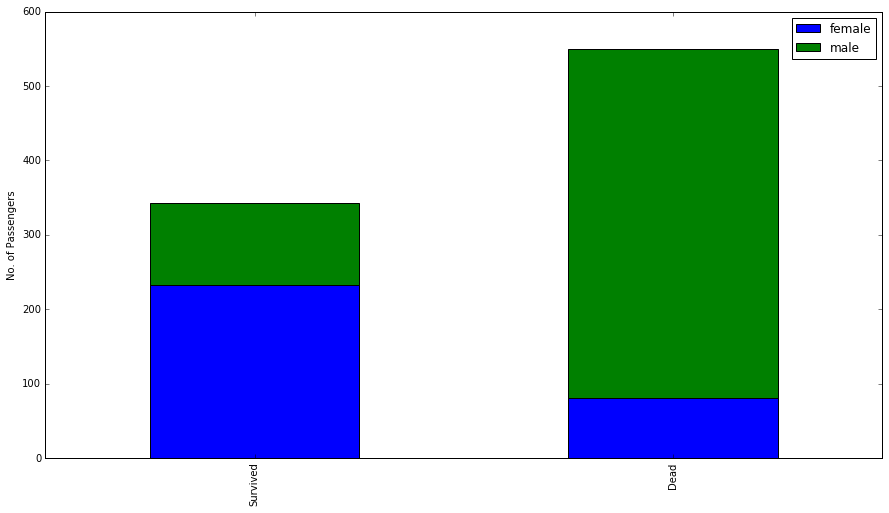

In [2]:
sex_survived = train["Sex"][train["Survived"] == 1].value_counts()
sex_dead = train["Sex"][train["Survived"] == 0].value_counts()
df = pd.DataFrame([sex_survived, sex_dead])
df.index = ['Survived','Dead']
ax = df.plot(kind='bar',stacked=True, figsize=(15,8))
ax.set_ylabel("No. of Passengers")

From this, we can infer that more people under the 'Female' category survived as compared to those who died, whereas under the 'Male' category, more people died as compared to the ones who survived.

In [3]:
# We will have to fill all the NaN values of Age
# Before we can perform any computations on that data

# Generate random values between mean + std and mean - std

train_mean = train["Age"].mean()
train_std = train["Age"].std()
train_count = train["Age"].isnull().sum()

rand_train = np.random.randint(train_mean - train_std, train_mean + train_std, size = train_count)

train["Age"][np.isnan(train["Age"])] = rand_train

C:\Users\Aakanksha\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


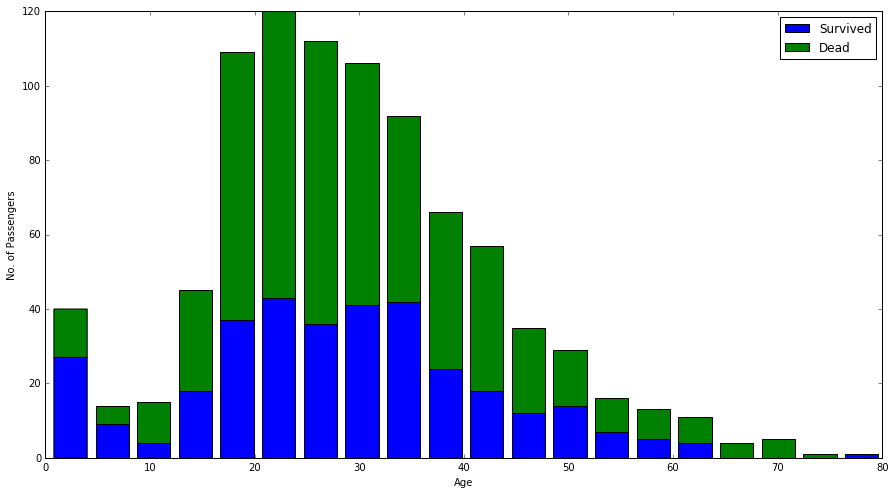

In [4]:
figure = plt.figure(figsize=(15,8))
plt.hist([train[train['Survived']==1]['Age'], train[train['Survived']==0]['Age']], stacked=True, bins = 20, label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('No. of Passengers')
plt.legend()

We observe that the ratio of those who survived is greater than those who died mainly in the age-bracket of children, i.e. people less than ~ 18 years old 

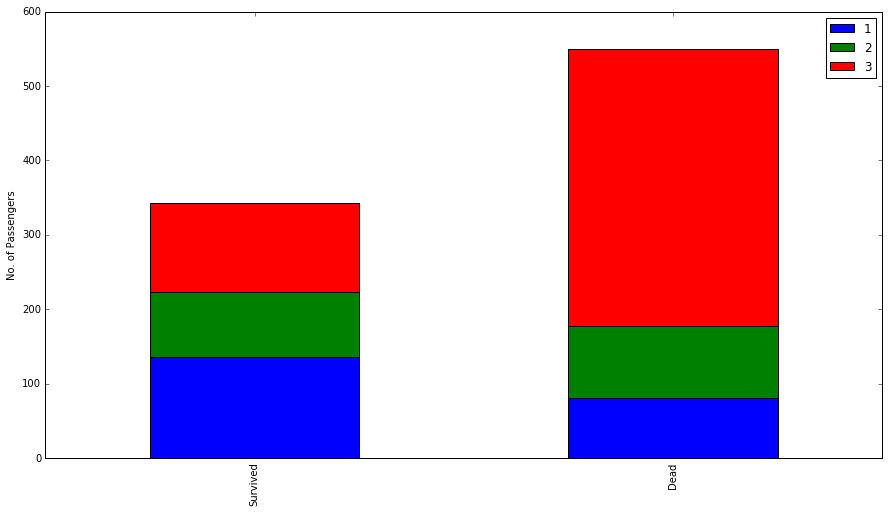

In [5]:
surv_class = train["Pclass"][train["Survived"] == 1].value_counts()
dead_class = train["Pclass"][train["Survived"] == 0].value_counts()
df = pd.DataFrame([surv_class, dead_class])
df.index = ["Survived", "Dead"]
ax = df.plot(kind='bar', stacked = True, figsize=(15,8))
ax.set_ylabel("No. of Passengers")

If we compare the two bars, we see that more people of the first class survived, but the ratio of people from the second and third class who died was greater than those who survived. 

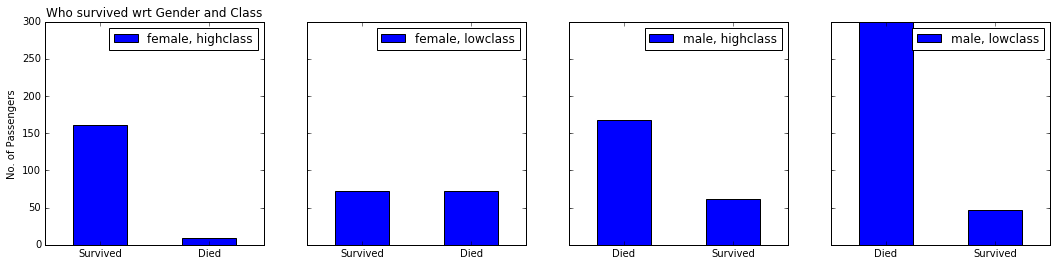

In [6]:
fig = plt.figure(figsize = (18, 4))

ax1 = fig.add_subplot(141)
female_highclass = train["Survived"][train["Sex"] == "female"][train["Pclass"] != 3].value_counts()
female_highclass.plot(kind='bar', label = 'female, highclass')
ax1.set_xticklabels(['Survived', 'Died'], rotation = 0)
ax1.set_ylabel("No. of Passengers")
plt.title("Who survived wrt Gender and Class")
plt.legend()

ax2 = fig.add_subplot(142, sharey = ax1)
female_lowclass = train["Survived"][train["Sex"] == 'female'][train["Pclass"] == 3].value_counts()
female_lowclass.plot(kind='bar', label = 'female, lowclass')
ax2.set_xticklabels(['Survived', 'Died'], rotation = 0)
plt.legend()

ax3 = fig.add_subplot(143, sharey = ax1)
male_highclass = train["Survived"][train["Sex"] == "male"][train["Pclass"] != 3].value_counts()
male_highclass.plot(kind='bar', label = 'male, highclass')
ax3.set_xticklabels(['Died', 'Survived'], rotation = 0)
plt.legend()

ax4 = fig.add_subplot(144, sharey = ax1)
male_lowclass = train["Survived"][train["Sex"] == 'male'][train["Pclass"] == 3].value_counts()
male_lowclass.plot(kind='bar', label = 'male, lowclass')
ax4.set_xticklabels(['Died', 'Survived'], rotation = 0)
plt.legend()

These graphs show that the chances of survival were highest for females of the high class, followed by females of the low class, males of the high class and then lastly, males from the low class

In [7]:
### Now let's see the correlation between fares, titles, age and survival ###

In [8]:
# Extracting the Titles

train['Title'] = train['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())

# Making some groups based upon similar titles

train['Title'][train['Title'] == 'Jonkheer'] = 'Master'
train['Title'][train['Title'].isin(['Ms', 'Mlle'])] = 'Miss'
train['Title'][train['Title'] == 'Mme'] = 'Mrs'
train['Title'][train['Title'].isin(['Capt','Don','Major','Col', 'Sir', 'Rev'])] = 'Sir'
train['Title'][train['Title'].isin(['Dona', 'Lady', 'the Countess'])] = 'Lady'

C:\Users\Aakanksha\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Aakanksha\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Aakanksha\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Aakanksha\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [9]:
# Before bringing Fare into the picture, we'll have to remove NaN values

train['Fare'] = train['Fare'].fillna(train['Fare'].median())

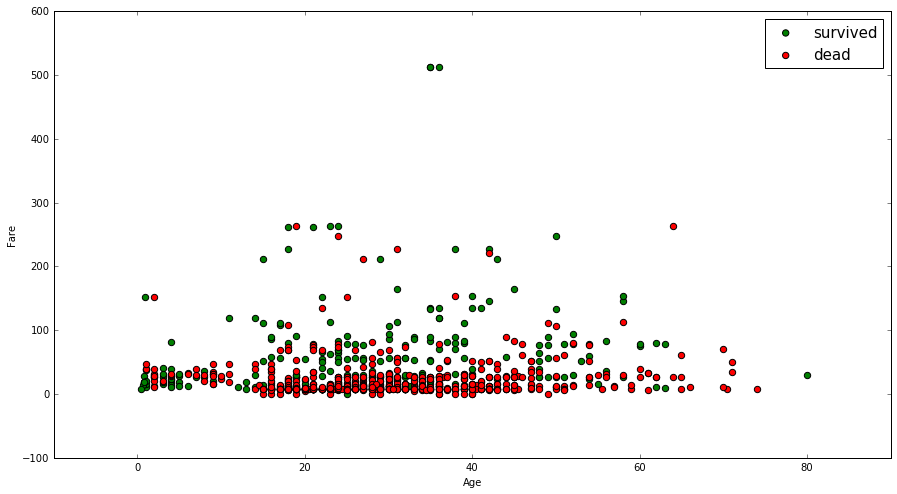

In [10]:
plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.scatter(train[train['Survived']==1]['Age'],train[train['Survived']==1]['Fare'],c='green',s=40)
ax.scatter(train[train['Survived']==0]['Age'],train[train['Survived']==0]['Fare'],c='red',s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=15)

We can observe a cluster of red dots at the bottom of the graph, between the ages of 20 and 50. Most people within this group who had lesser ticket fare died. 

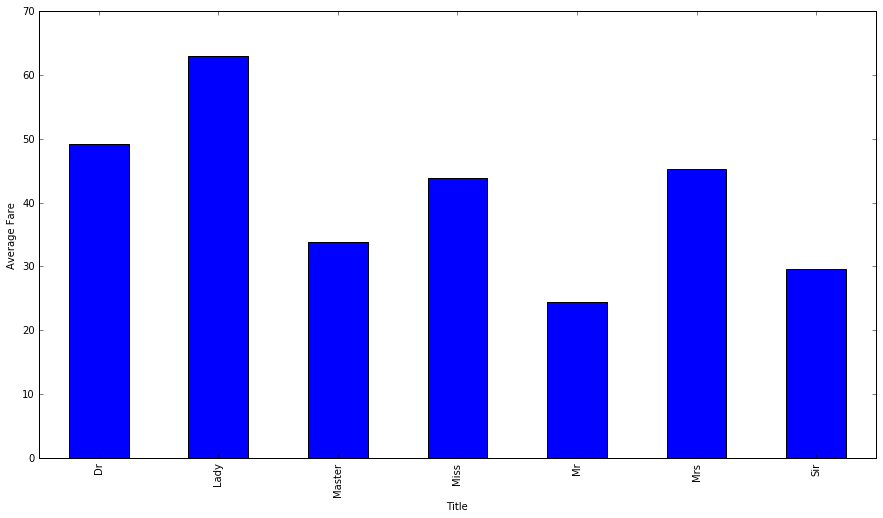

In [11]:
df = train.groupby(['Title'])['Fare'].mean()
ax = df.plot(kind='bar', figsize = (15,8))
ax.set_ylabel("Average Fare")

This shows the average fare of all titles. We can observe that on an average, the females had costlier tickets (Lady > Mrs > Miss). Among the males, the following order can be observed: Master > Sir > Mister. 'Dr' title was carried by both males and females. 

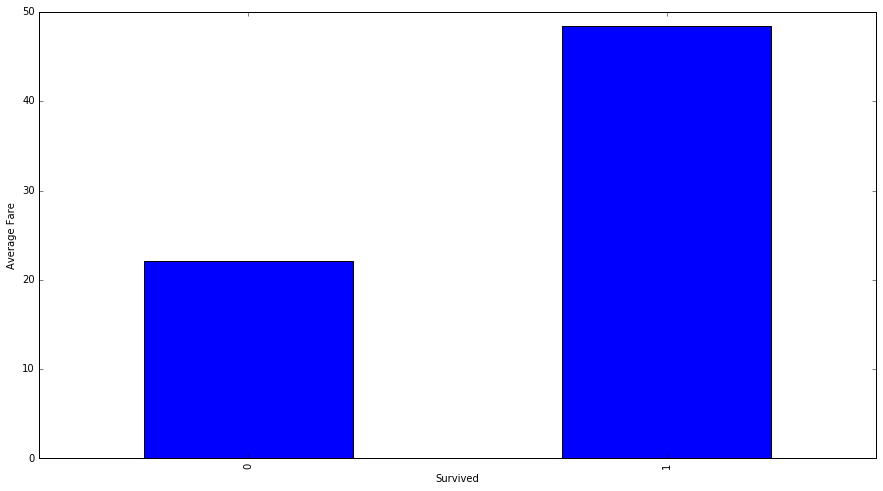

In [12]:
df = train.groupby(['Survived'])['Fare'].mean()
ax = df.plot(kind='bar', figsize = (15,8))
ax.set_ylabel("Average Fare")

This shows that the average fare paid by those who survived was much greater than the average fare paid by those who didn't.

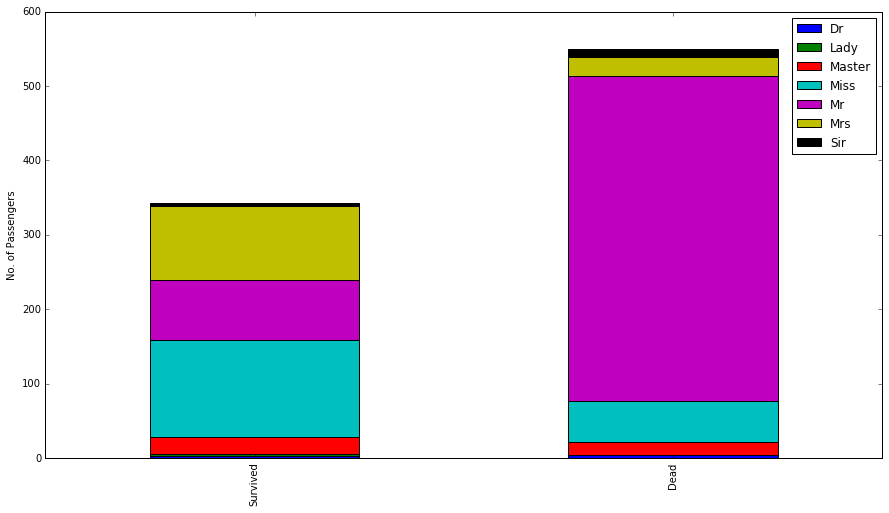

In [13]:
title_survived = train["Title"][train["Survived"] == 1].value_counts()
title_dead = train["Title"][train["Survived"] == 0].value_counts()
df = pd.DataFrame([title_survived, title_dead])
df.index = ["Survived", "Dead"]
ax = df.plot(kind='bar', stacked = True, figsize = (15,8))
ax.set_ylabel("No. of Passengers")

From this we observe that while the highest chances of survival were for those with the title 'Miss', followed by 'Mrs', the highest chance of death was for those with the title 'Mr'.

### Playing around with the features 

In [14]:
# Import the data and combine the target and test data
# To get a more inclusive model

train = train_original.copy()
test = test_original.copy()

target = train['Survived']
train.drop('Survived', inplace = True, axis = 1)

total = train.append(test)
total.reset_index(inplace = True)
total.drop('index', inplace = True, axis = 1)

In [15]:
total.shape

(1309, 11)

In [16]:
# Let's extract the titles once again

total['Titles'] = total['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())

In [17]:
# Let's reduce the number of titles by grouping

total['Titles'][total['Titles'] == 'Jonkheer'] = 'Master'
total['Titles'][total['Titles'].isin(['Ms', 'Mlle'])] = 'Miss'
total['Titles'][total['Titles'] == 'Mme'] = 'Mrs'
total['Titles'][total['Titles'].isin(['Capt','Don','Major','Col', 'Sir', 'Rev'])] = 'Sir'
total['Titles'][total['Titles'].isin(['Dona', 'Lady', 'the Countess'])] = 'Lady'

C:\Users\Aakanksha\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Aakanksha\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Aakanksha\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Aakanksha\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying

##### Filling all the missing values 

In [18]:
# Age

# Generate random values between mean + std and mean - std

total_mean = total["Age"].mean()
total_std = total["Age"].std()
total_count = total["Age"].isnull().sum()

rand_total = np.random.randint(total_mean - total_std, total_mean + total_std, size = total_count)

total["Age"][np.isnan(total["Age"])] = rand_total

C:\Users\Aakanksha\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [19]:
# Embarked

# Fill missing values with the maximum occuring value

total['Embarked'].fillna('S', inplace = True)

In [20]:
# Fare

# Fill the fare with a median value

total['Fare'].fillna(total['Fare'].median(), inplace = True)

In [21]:
# Cabin 

total['Cabin'].fillna('U', inplace = True)

In [22]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
Titles         1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


No null values now. Let us now convert our features into binary features.

In [23]:
total['Cabin'] = total['Cabin'].map(lambda c: c[0])

col_names = total[['Titles', 'Embarked', 'Cabin', 'Sex']]

for col in col_names:
    total = pd.concat([total, pd.get_dummies(total[col]).rename(columns= lambda x: col + '_' + str(x))], axis = 1)

In [25]:
# Convert SibSp and Parch into one "Family" attribue
# Value 0 for no family on board
# Value 1 for one or more family members on board

total["Family"] = total["SibSp"] + total["Parch"]

total["Family"].loc[total["Family"] > 0] = 1
total["Family"].loc[total["Family"] == 0] = 0

In [26]:
# Convert Age into Age-Brackets
# Assign numbers to those brackets

for val in total["Age"]:
    if val >= 0 and val < 20:
        total["Age"] = 0
    elif val >= 20 and val < 40:
        total["Age"] = 1
    elif val >= 40 and val < 60:
        total["Age"] = 2
    else:
        total["Age"] = 3

In [27]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 34 columns):
PassengerId      1309 non-null int64
Pclass           1309 non-null int64
Name             1309 non-null object
Sex              1309 non-null object
Age              1309 non-null int64
SibSp            1309 non-null int64
Parch            1309 non-null int64
Ticket           1309 non-null object
Fare             1309 non-null float64
Cabin            1309 non-null object
Embarked         1309 non-null object
Titles           1309 non-null object
Titles_Dr        1309 non-null float64
Titles_Lady      1309 non-null float64
Titles_Master    1309 non-null float64
Titles_Miss      1309 non-null float64
Titles_Mr        1309 non-null float64
Titles_Mrs       1309 non-null float64
Titles_Sir       1309 non-null float64
Embarked_C       1309 non-null float64
Embarked_Q       1309 non-null float64
Embarked_S       1309 non-null float64
Cabin_A          1309 non-null float64
Cabin_B     

In [28]:
total.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Titles', 'Sex'], axis=1, inplace = True)

In [29]:
total.head()

,Pclass,Age,Fare,Titles_Dr,Titles_Lady,Titles_Master,Titles_Miss,Titles_Mr,Titles_Mrs,Titles_Sir,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Sex_female,Sex_male,Family
0,3,1,7.2500,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
1,1,1,71.2833,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,3,1,7.9250,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
3,1,1,53.1000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4,3,1,8.0500,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0


Our data is now ready for a random forest classifier

In [30]:
train = total.head(891)
test = total.iloc[891:]

In [32]:
random_forest = RandomForestClassifier(n_estimators = 100, oob_score = True)
random_forest.fit(train, target)
random_predict = random_forest.predict(test)

acc_random_forest = round(random_forest.score(train, target) * 100, 2)
print acc_random_forest
print random_forest.oob_score_

93.15
0.811447811448
